# Project: Investigate a Dataset - [TMDb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'> </a>

## Introduction

### Description
This dataset contains several metrics from TMDb about 10,000+ movies. However, data needs to be cleaned in order to answer some questions regarding the movies' revenue, budget and popularity. In addition we would like to know which year was the most successful in 20th century and who were the best directors.
### Questions for Analysis

- Who are the most successful directors ? 
- Does budget affect revenue ? 
- Does revenue affect popularity ?
- What is the most successful year in the 20th Century ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

<a id = 'wrangling'></a>
## Data Wrangling

In [36]:
# Importing data
directory = os.getcwd()
df = pd.read_csv(os.path.join(directory, 'tmdb-movies.csv'))
df.shape

(10866, 21)

In [3]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


We have 1 duplicate

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

We do not need all the columns so we will drop the unwanted

In [6]:
to_drop = [
    'id',
    'cast',
    'homepage',
    'tagline',
    'keywords',
    'overview',
    'runtime',
    'production_companies',
    'release_date',
    'budget_adj',
    'revenue_adj']
df_v2 = df.copy().drop(to_drop, axis= 1)

In [7]:
df_v2.head(1)

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [8]:
df_v2.groupby('original_title')['imdb_id'].count().sort_values(ascending=False)


original_title
Hamlet                        4
Wuthering Heights             3
Beauty and the Beast          3
Life                          3
Carrie                        3
                             ..
Hulk vs. Wolverine            0
Fallen: The Destiny           0
Fallen: The Journey           0
Sense8: Creating the World    0
Hulk vs. Thor                 0
Name: imdb_id, Length: 10571, dtype: int64

Some movies have the same title

In [9]:
df_v2.budget.value_counts(), df_v2.revenue.value_counts()

(0           5696
 20000000     190
 15000000     183
 25000000     178
 10000000     176
             ... 
 40000          1
 28             1
 68             1
 3500159        1
 19000          1
 Name: budget, Length: 557, dtype: int64,
 0            6016
 12000000       10
 10000000        8
 11000000        7
 2000000         6
              ... 
 93354918        1
 76578641        1
 171269535       1
 215000000       1
 33736689        1
 Name: revenue, Length: 4702, dtype: int64)

Some movies have either budget or revvenue = 0

## Data Cleaning
- Some movie titles aren't readable
- Some movies have the same title
- Budget and revenue in some movies = 0

### Dropping unreadable titles

We will sort the values alphabetically so movies with wierd characters are at the bottom

In [10]:
df_v3 = df_v2.copy()
pre_drop = df_v3.original_title.sort_values().iloc[-50:]
pre_drop

9904                                       Zorba the Greek
5550                                                  Zulu
9893                                                  Zulu
2306                                           Zwart Water
3884                                                eCupid
2492                                              eXistenZ
3337                                  iCarly: iGo to Japan
5969                                                iSteve
6026                                      uwantme2killhim?
3924                                                   xXx
6222                               xXx: State of the Union
10497                                      Â¡Three Amigos!
3173                                    Ãšltima Parada 174
4152                                           Ã”nibus 174
6203                                             Ã†on Flux
10215            Î¤Î± Ï€Î±Î¹Î´Î¹Î¬ Ï„Î¿Ï… Î´Î¹Î±Î²ÏŒÎ»Î¿Ï…
6065                                  Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°

These are the unreadable movie titles

In [11]:
titles_to_drop = pre_drop.loc[10497:4827]
list(titles_to_drop)

['Â¡Three Amigos!',
 'Ãšltima Parada 174',
 'Ã”nibus 174',
 'Ã†on Flux',
 'Î¤Î± Ï€Î±Î¹Î´Î¹Î¬ Ï„Î¿Ï… Î´Î¹Î±Î²ÏŒÎ»Î¿Ï…',
 'Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´',
 'ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ',
 'Ð‘Ñ€Ð°Ñ‚ 2',
 '×›×™×“×•×Ÿ',
 'à¸ªà¸´à¹ˆà¸‡à¹€à¸¥à¹‡à¸à¹€à¸¥à¹‡à¸à¸—à¸µà¹ˆà¹€à¸£à¸µà¸¢à¸à¸§à¹ˆà¸²...à¸£à¸±à¸',
 'à¸•à¹‰à¸¡à¸¢à¸³à¸à¸¸à¹‰à¸‡ 2',
 'ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰',
 'ã‚´ã‚¸ãƒ©vsã‚¹ãƒšãƒ¼ã‚¹ã‚´ã‚¸ãƒ©',
 'ä¸‰å›½ä¹‹è§é¾™å¸ç”²',
 'å¤ªæžå¼\xa0ä¸‰ä¸°',
 'å¸«å¼Ÿå‡ºé¦¬',
 'æ±äº¬æ®‹é…·è\xad¦å¯Ÿ',
 'æˆé¾çš„ç‰¹æŠ€',
 'æ’•ç¥¨é¢¨é›²',
 'ç\xad‰ä¸€å€‹äººå’–å•¡',
 'ç»™çˆ¸çˆ¸çš„ä¿¡',
 'è§£æ•‘å´å…ˆç”Ÿ',
 'è³½å¾·å…‹Â·å·´èŠ (ä¸Š)  å¤ªé™½æ——',
 'è‰‹èˆº',
 'é»‘å¤ªé™½731',
 'é»‘ç¤¾ä¼š2ï¼šä»¥å’Œä¸ºè´µ',
 'é€ƒå\xad¦å¨é¾™',
 'ê³\xa0ì‚¬ ë‘ ë²ˆì§¸ ì´ì•¼ê¸°: êµìƒì‹¤ìŠµ',
 'ëª½íƒ€ì£¼',
 'ì§íŒ¨',
 'ì§‘ìœ¼ë¡œ ê°€ëŠ” ê¸¸',
 'ìºì¹˜ë¯¸',
 'ìž‘ì—…ì˜ ì\xa0•ì„',
 'ì˜í˜•ì\xa0œ',
 'ì•„ê¸°ì™€ ë‚˜',
 'ì‹\xa0ì˜ í•œ ìˆ˜',
 'í¬í™” ì†ìœ¼ë¡œ',
 'í˜•ì‚¬ Duelist',
 'í•˜ìš¸ë§']

In [12]:
df_v3 = df_v3[~df_v3.original_title.isin(titles_to_drop)]
df_v3.query("original_title in 'ä¸‰å›½ä¹‹è§é¾™å¸ç”²' ")

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year


Now we dropped unreadable movie titles

### Similar movie names

In [13]:
df_v4 = df_v3.copy()
titles = df_v4.original_title.value_counts()
same_titles = list(titles.index.where(titles > 1))

In [14]:
ilocs = []
titles = []
years = []
for i,(title,year) in enumerate(zip(df_v4.original_title, df.release_year)):
        if title in same_titles:
                df_v4.original_title.iloc[i] = f'{title}_{df_v4.release_year.iloc[i]}'

/Users/zeyadahmed/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df_v4[df_v4.original_title.str.contains('Hamlet_')]

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
1890,tt1449175,0.086490,0,0,Hamlet_2009,Gregory Doran,Drama,13,6.4,2009
8573,tt0116477,0.383469,0,0,Hamlet_1996,Kenneth Branagh,Drama,51,6.7,1996
8797,tt0171359,0.277798,2000000,1568749,Hamlet_2000,Michael Almereyda,Drama,18,5.0,2000
10106,tt0099726,0.067973,0,20710451,Hamlet_1990,Franco Zeffirelli,Drama|History,43,6.5,1990


In [16]:
df_v4.original_title.isna().sum()

0

Now no movies have the same name

### Revenue and Budget = 0
We will remove movies which have 0 budget or revenue for accuracy in conclusions

In [17]:
df_v5 = df_v4.copy()
df_v5 = df_v5[df_v5.revenue != 0]
df_v5

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10822,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,Drama,74,7.5,1966
10828,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,Mystery|Thriller,46,6.3,1966
10829,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,Action|Western,36,6.9,1966
10835,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,28,7.0,1966


In [18]:
df_v5 = df_v5[df_v5.budget != 0]
df_v5

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10822,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,Drama,74,7.5,1966
10828,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,Mystery|Thriller,46,6.3,1966
10829,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,Action|Western,36,6.9,1966
10835,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,28,7.0,1966


In [19]:
df_main = df_v5.copy()
df_main.head()

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Who are the most successful directors ?
For this question we will find directors who have higher than average movie rating

In [20]:
df_q1 = df_main.copy()
df_q1.vote_average.describe()[4:7]

25%    5.7
50%    6.2
75%    6.7
Name: vote_average, dtype: float64

In [21]:
df_top_dir = df_q1.query("vote_average >= 6.7")
df_top_dir.head()

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015
5,tt1663202,9.110700,135000000,532950503,The Revenant_2015,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,3929,7.2,2015
7,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,4572,7.6,2015


In [22]:
top_directors = df_top_dir.groupby('director')[['vote_average', 'vote_count']].mean()
top_directors.sort_values(by=['vote_average','vote_count'], ascending=False, inplace= True)
top_10_diretors = top_directors['vote_average'][:10]
top_10_diretors

director
Frank Darabont      8.200000
Damien Chazelle     8.200000
Irvin Kershner      8.000000
Pete Docter         8.000000
Morten Tyldum       8.000000
Tony Kaye           8.000000
Lenny Abrahamson    8.000000
Xavier Dolan        8.000000
Jonathan Demme      7.933333
James Gunn          7.900000
Name: vote_average, dtype: float64

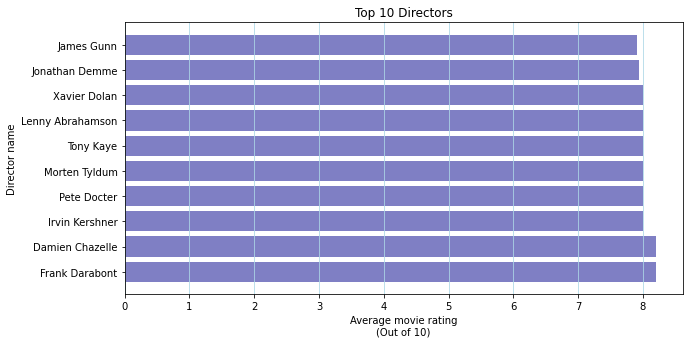

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(color='lightblue', axis='x', linestyle='-')

ax.barh(top_10_diretors.index, top_10_diretors.values, color='darkblue', alpha=0.5)

ax.set(title='Top 10 Directors',
    xlabel='Average movie rating\n(Out of 10)',
    ylabel='Director name');


#### So the top 10 directors are:
1. Frank Darabont
2. Damien Chazelle
3. Irvin Kershner
4. Pete Docter
5. Morten Tyldum
6. Tony Kaye
7. Lenny Abrahamson
8. Xavier Dolan
9. Jonathan Demme
10. James Gunn

### Does budget affect revenue ?

First of all we will eliminate outliers, and only investigate values withing the IQR

In [24]:
def remove_outliers(df,var1,var2):
    """
    Returns a DataFrame without outliers from two specified columns

    Parameters:
    -----------
    (df): Main DataFrame
    (var1): First column name to remove outliers from
    (var2): Second column name to remove outliers from
    """
    # outliers = 1.5 x IQR + Q3 or Q1 - 1.5 x IQR
    iqr_var1 = df[var1].describe()[6] - df[var1].describe()[4]
    var1_lower = df[var1].describe()[4] - 1.5 * iqr_var1
    var1_upper = df[var1].describe()[6] + 1.5 * iqr_var1

    iqr_var2 = df[var2].describe()[6] - df[var2].describe()[4]
    var2_lower = df[var2].describe()[4] - 1.5 * iqr_var2
    var2_upper = df[var2].describe()[6] + 1.5 * iqr_var2

    df = df.loc[(df[var1] > var1_lower) & (df[var1] < var1_upper) & (df[var2] > var2_lower) & (df[var2] < var2_upper)]

    return df

In [25]:
df_q2 = df_main.copy()
df_q2 = remove_outliers(df_q2, 'budget', 'revenue')
df_q2.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
12,tt0470752,6.118847,15000000,36869414,Ex Machina,Alex Garland,Drama|Science Fiction,2854,7.6,2015
13,tt2120120,5.984995,88000000,243637091,Pixels,Chris Columbus,Action|Comedy|Science Fiction,1575,5.8,2015


We then create a line of best fit with Numpy

In [26]:
# y = mx + c, where m is the gradient and c is the y intercept
m, c = np.polyfit(df_q2.budget, df_q2.revenue, 1)
median_rev = np.median(df_q2.revenue)
median_bud = np.median(df_q2.budget)
arr_rev = np.full(len(df_q2.revenue), median_rev)
arr_bud = np.full(len(df_q2.budget), median_bud)


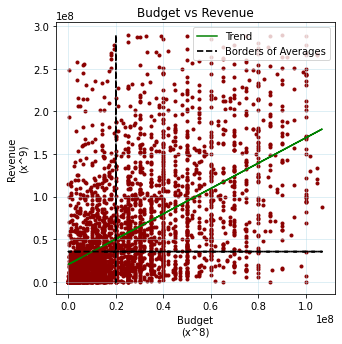

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(color='lightblue', linestyle='-', alpha=0.5)
ax.scatter(df_q2.budget, df_q2.revenue, color='darkred', marker='.')
ax.set(title='Budget vs Revenue',
    xlabel='Budget\n(x^8)',
    ylabel='Revenue\n(x^9)')
ax.plot(df_q2.budget, m*df_q2.budget+c, color='green', linewidth=1.5)
ax.plot(df_q2.budget,arr_rev, color="black", linewidth=1.7, linestyle='--')
ax.plot(arr_bud,df_q2.revenue, color="black", linewidth=1.7, linestyle='--')
ax.legend(['Trend','Borders of Averages']);

So higher popularity, on average, results in higher revenue 

### Revenue and popularity of movies?

In [28]:
df_q3 = df_main.copy()
df_q3 = remove_outliers(df_q3, 'popularity', 'revenue')
df_q3

,imdb_id,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
54,tt2058673,2.614499,105000000,133718711,Point Break_2015,Ericson Core,Action|Crime|Thriller,505,5.5,2015
55,tt2503944,2.584264,20000000,36606743,Burnt,John Wells,Drama,631,6.3,2015
56,tt2140379,2.578919,26000000,30523226,Self/less,Tarsem Singh,Science Fiction|Mystery|Thriller,719,6.2,2015
57,tt3045616,2.575711,60000000,30418560,Mortdecai,David Koepp,Comedy|Adventure,696,5.3,2015
58,tt0810819,2.557859,15000000,64191523,The Danish Girl,Tom Hooper,Drama,867,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10822,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,Drama,74,7.5,1966
10828,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,Mystery|Thriller,46,6.3,1966
10829,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,Action|Western,36,6.9,1966
10835,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,28,7.0,1966


In [29]:
# y = mx + c, where m is the gradient and c is the y intercept
m, c = np.polyfit(df_q3.revenue,df_q3.popularity, 1)
median_rev = np.median(df_q3.revenue)
median_pop = np.median(df_q3.popularity)
arr_rev = np.full(len(df_q3.revenue), median_rev)
arr_pop = np.full(len(df_q3.popularity), median_pop)

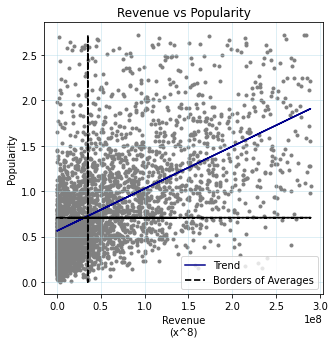

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(color='lightblue', linestyle='-', alpha=0.5)
ax.scatter(df_q3.revenue, df_q3.popularity, color='grey', marker='.')
ax.set(title='Revenue vs Popularity',
    xlabel='Revenue\n(x^8)',
    ylabel='Popularity')
ax.plot(df_q3.revenue, m*df_q3.revenue+c, color='darkblue', linewidth=1.5)
ax.plot(arr_rev, df_q3.popularity, color="black", linewidth=1.7, linestyle='--')
ax.plot(df_q3.revenue,arr_pop, color="black", linewidth=1.7, linestyle='--')
ax.legend(['Trend','Borders of Averages']);

It seems that the higher the revenue the more popular the film is

### Most successful year in 20th Century ?

In [32]:
df_q4 = df_main.copy()
df_q4 = df_q4.groupby('release_year', as_index=False)[['vote_average', 'vote_count']].mean()
df_q4 = df_q4[df_q4.release_year > 2000].sort_values(by=['vote_average', 'vote_count'], ascending=False)
df_q4

,release_year,vote_average,vote_count
54,2014,6.336970,1029.830303
55,2015,6.243750,971.056250
53,2013,6.203911,1019.793296
47,2007,6.177576,464.393939
51,2011,6.103518,609.025126
50,2010,6.103371,648.764045
44,2004,6.101370,496.452055
42,2002,6.100787,445.685039
45,2005,6.087037,398.438272
46,2006,6.062130,386.408284


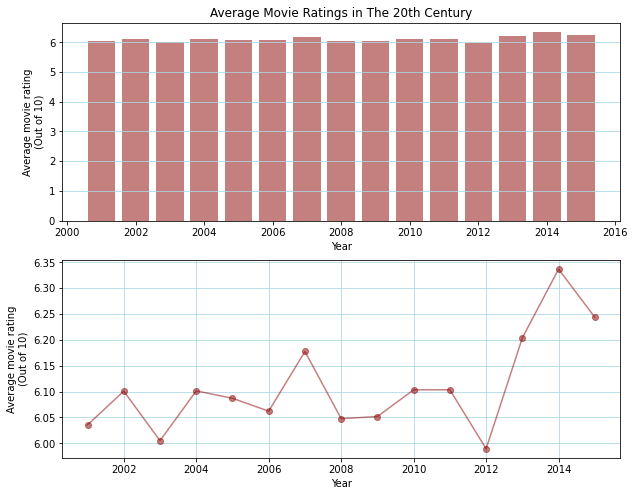

In [34]:
fig, ax = plt.subplots(2, figsize=(10,8))
ax[0].grid(color='lightblue', axis='y', linestyle='-')

ax[0].bar(df_q4.release_year, df_q4.vote_average, color='darkred', alpha=0.5)

ax[0].set(title='Average Movie Ratings in The 20th Century',
    xlabel='Year',
    ylabel='Average movie rating\n(Out of 10)');
    
sorted = df_q4.sort_values(by=["release_year"])
year = sorted.release_year
avg = sorted.vote_average

ax[1].grid(color='lightblue', axis='both', linestyle='-')

ax[1].plot(year,avg, marker='o', color='darkred', alpha=0.5)

ax[1].set(xlabel='Year',
    ylabel='Average movie rating\n(Out of 10)');

Most years had an average of above 6. However, 2014 had the highest ratings

<a id='conclusion' ></a>

## Conclusion
After analysis we can now answer our questions:
- (Most successful directors ?) --> Frank Darabont and Damien Chazelle since they had the highest average movie ratings.
- (Does budget affect revenue ?) --> Yes, since our graph illustrated that there is a positive correlation.
- (Does revenue affect popularity ?) --> Yes, since our graph illustrated that there is a positive correlation.
- (Which year was the most successful ?) --> 2014, because it had the highest average movie rating (~6.3).

